## Mud card answers
- **What improvements do the algorithms in scikit/ other libraries contain?**
    - the learning rate is adaptively determined
    - my algorithm gets stuck in a local minimum, algos in sklearn are more robust (stochastic) and they have a much better chance of finding the global minimum
    - better implementation in cython to optimize for speed
    - etc
- **How should we change the loss function using gradient descent for logistic regression**
    - the cost function then the logloss metric and you need to update the derivatives in the gradient descent function accordingly
- **Do you have recommendations for applying alternative gradient descent techniques?**
    - if an ML model has multiple gradient descent algorithms implemented, the sklearn documentation will contain the list with recommendations which one to choose
- **The learning rate here is a fixed value, but I think it should decrease as we're approaching the valley. So how can we decide when and how much to decrease our learning rate so that our algorithm won't just leap over the minima?**
    - that's called adaptive step size and it's implemented in the opposite way of your description
    - if the gradient is steep, you want to make a small step to avoid numerical instabilities
    - if the gradient is shallow, you can make a larger step
- **How would your gradient descent function handle saddles and local minima?**
    - it wouldn't, that's why you should only use it for learning purposes :)
- **"Can you talk about multi-class logistic regression? What are some typical methods to solve that problem?**
    - all sklearn classification models (logistic regression included) handle multiclass classification problems natively, no other work or arguments are required on your side
- **For the logistic regression, why do we choose logloss metric as the cost function but not others like MSE?**
    - MSE is a regression metric because it compares the continuous true labels to the continuous predicted labels
    - for classification, we need a metric that compares the categorical true labels to either the predicted classes (also categorical) or predicted probabilities (continuous)
- **I'm confused about how log-loss is defined. MSE and its variants make sense, because we are roughly trying to measure the area between y_true and y_pred. What aspect of the two functions is log-loss trying to measure? Is it related to the sigmoid function itself (maybe via derivative?)**
- **Could you explain the "The logloss metric" more? Like how to use it when we evaluate our prediction model**
    - it is not related to the sigmoid function
    - logloss compares the categorical true labels to the predicted probabilities which are continuous
    - read more [here](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)

## Regularization

By the end of this lecture, you will be able to
- Describe why regularization is important and what are the two types of regularization
- Describe how regularized linear regression works
- Describe how regularized logistic regression works


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe why regularization is important and what are the two types of regularization**
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Let's work with a new example dataset

(40, 1)
(40,)


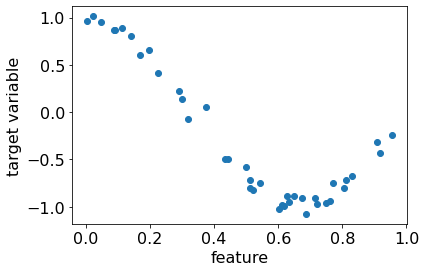

In [1]:
# load packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

df = pd.read_csv('data/regularization_example.csv')
X_ori = df['x0'].values.reshape(-1, 1)
y = df['y'].values
print(np.shape(X_ori))
print(np.shape(y))

# visualize the data
plt.scatter(X_ori,y)
plt.xlabel('feature')
plt.ylabel('target variable')
plt.show()

In [2]:
# lets generate more features because a linear model will obviously be insufficient to fit the data well
pf = PolynomialFeatures(degree = 20,include_bias=False)
X = pf.fit_transform(X_ori)
print(np.shape(X))
print(pf.get_feature_names())

(40, 20)
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15', 'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20']


## We split data into train and validation!

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print(np.shape(X_train),np.shape(y_train))
print(np.shape(X_val),np.shape(y_val))

(32, 20) (32,)
(8, 20) (8,)


## Let's train and validate some linear regression models

### Use the first feature only

intercept: 0.8018842867499771
theta: [-2.08151827]
train MSE: 0.13964692457239292
val MSE: 0.17142516062337293


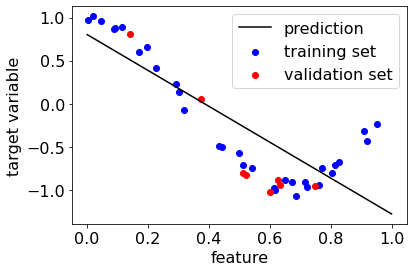

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# let's use only the first feature
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train[:,:1], y_train)
print('intercept:',linreg.intercept_)
print('theta:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train[:,:1]))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val[:,:1]))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.scatter(X_train[:,0],y_train,color='b',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(x_model.reshape(-1,1)),color='k',label='prediction')

plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


### Use all features

intercept: 0.9477633034022246
thetas: [ 4.61317516e+00  1.62323828e+01 -3.58564956e+03 -1.04273500e+05
  6.49277438e+06 -1.28991084e+08  1.45816807e+09 -1.09172634e+10
  5.81475939e+10 -2.29422947e+11  6.86892361e+11 -1.58180067e+12
  2.81704008e+12 -3.87304923e+12  4.07254127e+12 -3.21378639e+12
  1.84142164e+12 -7.22982466e+11  1.73895305e+11 -1.93148429e+10]
train MSE: 0.0022241714817557356
val MSE: 0.03281361237667026


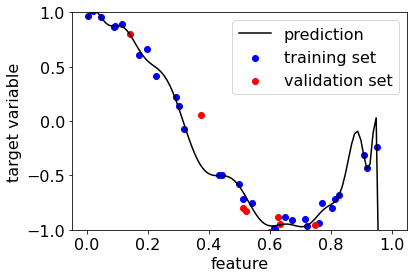

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# use all features
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
print('intercept:',linreg.intercept_)
print('thetas:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.scatter(X_train[:,0],y_train,color='b',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## What to do?
- the model is visibly performs poorly when only the original feature is used
- the model performs very good on the training set but poorly on the validation set when all features are used
    - the thetas are huge!

## Regulazation solves this problem!


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- **Describe how regularized linear regression works**
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Regularization to the rescue!
- let's change the cost function and add a <font color='RED'>penalty term</font> for large thetas
- **Lasso regression**: regularize using the l1 norm of theta:
   
### <center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>   
   
- **Ridge regression**: regularize using the l2 norm of theta:
   
### <center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- $\alpha$ is the regularization parameter (positive number), it describes how much we penalize large thetas

- With the cost function changed, the derivatives in gradient descent need to be updated too!

## Feature selection with Lasso regularization
- Least Absolute Shrinkage and Selection Operator
- cost = MSE + $\alpha$ * l1 norm of $\theta$
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>  
- ideal for feature selection
- as $\alpha$ increases, more and more feature weights are reduced to 0.

In [16]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-7,0,29)
print(alpha)
thetas = []
models = []
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
    lin_reg.fit(X_train, y_train)
    thetas.append(lin_reg.coef_)
    models.append(lin_reg)
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

[1.00000000e-07 1.77827941e-07 3.16227766e-07 5.62341325e-07
 1.00000000e-06 1.77827941e-06 3.16227766e-06 5.62341325e-06
 1.00000000e-05 1.77827941e-05 3.16227766e-05 5.62341325e-05
 1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]


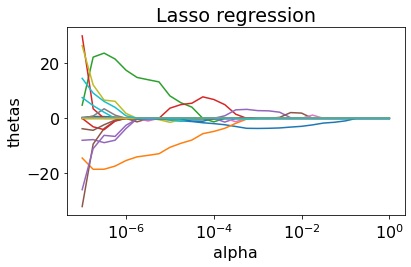

In [17]:
plt.plot(alpha, thetas)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('thetas')
plt.title('Lasso regression')
plt.tight_layout()
plt.savefig('figures/lasso_coefs.png',dpi=300)
plt.show()

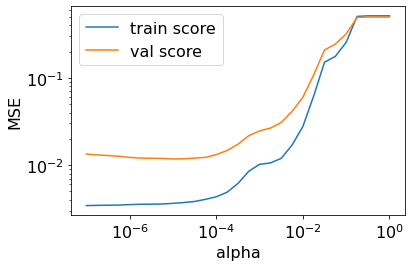

In [8]:
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_lasso.png',dpi=300)
plt.show()

## Bias vs variance
- Bias: the model performs poorly on both the train and validation sets
    - high alpha in our example
- the model performs very well on the training set but it performs poorly on the validation set
    - low alpha in our example
    - lowering the alpha further would improve the train score but the validation score would increase
    - we don't do it because of convergence issues

# The bias-variance trade off
- the curve of the validation score as a function of a hyper-parameter usually has a U shape if evaluation metric needs to be minimized, or an inverted U if the metric needs to be maximized
- choose the hyper-parameter value that gives you the best validation score

##  Quiz
Which alpha value gives the best validation score? Visualize that model! 

0.01175587413864319
1e-05
[1.e-05]


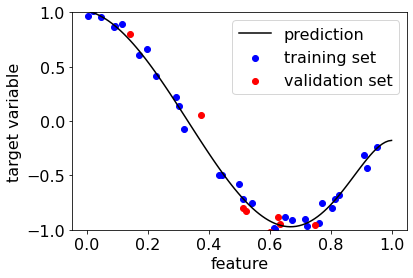

In [21]:
print(np.min(val_MSE))
print(alpha[np.argmin(val_MSE)])
print(alpha[val_MSE == np.min(val_MSE)])


x_model = np.linspace(0,1,100)
plt.scatter(X_train[:,0],y_train,color='b',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,models[np.argmin(val_MSE)].predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## The bias-variance tradeoff with Ridge regularization
- cost = MSE + $\alpha$ * l2 norm of $\theta$
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- as $\alpha$ approaches 0, we reproduce the linear regression weights
- small $\alpha$ creates high variance
- large $\alpha$ creates high bias

In [24]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-10,2,51)

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

thetas = []

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    thetas.append(lin_reg.coef_)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

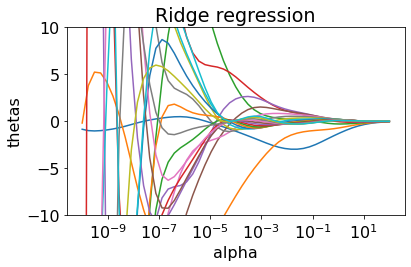

In [26]:
plt.plot(alpha, thetas) 
plt.semilogx()
plt.ylim([-1e1,1e1])
plt.xlabel('alpha')
plt.ylabel('thetas')
plt.title('Ridge regression')
plt.tight_layout()
plt.savefig('figures/ridge_coefs.png',dpi=300)
plt.show()

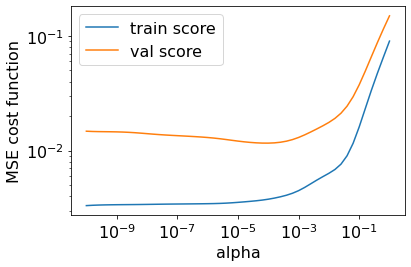

In [11]:
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_ridge.png',dpi=300)
plt.show()

## Quiz
Which $\alpha$ gives us the best tradeoff between bias and variance?

In [27]:
print(alpha[np.argmin(val_MSE)])


0.0001


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- **Describe how regularized logistic regression works**





## Logistic regression
- Recap: the logloss metric is the cost function

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
<center>$L(\theta) =  - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}})]$</center>

   - the logloss metric with l1 regularization

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>

   - the logloss metric with l2 regularization

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

## Logistic regression in sklearn

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha) # C is the inverse of the regularization strength
log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha)
# fit, predict, predict_proba are available 
# log_reg.coef_ returns the theta values


In [13]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

## Mud card